In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow 
import glob

In [16]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten,Conv2D,MaxPool2D
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.optimizers import Adam

In [17]:
import pathlib

In [18]:
pic_path=pathlib.Path('/content/drive/MyDrive/Colab Notebooks/actors')

In [19]:
pic_path

PosixPath('/content/drive/MyDrive/Colab Notebooks/actors')

In [20]:
mammooty =list(pic_path.glob('mammooty/*'))
mohanlal =list(pic_path.glob('mohanlal/*'))

In [21]:
len(mammooty)

2305

In [22]:
len(mohanlal)

2763

In [23]:
mammooty

[PosixPath('/content/drive/MyDrive/Colab Notebooks/actors/mammooty/1271.jpeg'),
 PosixPath('/content/drive/MyDrive/Colab Notebooks/actors/mammooty/1273.jpeg'),
 PosixPath('/content/drive/MyDrive/Colab Notebooks/actors/mammooty/1284.jpeg'),
 PosixPath('/content/drive/MyDrive/Colab Notebooks/actors/mammooty/1285.jpeg'),
 PosixPath('/content/drive/MyDrive/Colab Notebooks/actors/mammooty/1269.jpeg'),
 PosixPath('/content/drive/MyDrive/Colab Notebooks/actors/mammooty/1274.jpeg'),
 PosixPath('/content/drive/MyDrive/Colab Notebooks/actors/mammooty/1292.jpeg'),
 PosixPath('/content/drive/MyDrive/Colab Notebooks/actors/mammooty/1286.jpeg'),
 PosixPath('/content/drive/MyDrive/Colab Notebooks/actors/mammooty/1288.jpeg'),
 PosixPath('/content/drive/MyDrive/Colab Notebooks/actors/mammooty/1278.jpeg'),
 PosixPath('/content/drive/MyDrive/Colab Notebooks/actors/mammooty/1279.jpeg'),
 PosixPath('/content/drive/MyDrive/Colab Notebooks/actors/mammooty/1291.jpeg'),
 PosixPath('/content/drive/MyDrive/Colab

In [24]:
pic_dict={"mohanlal":mohanlal,"mammooty":mammooty}

In [25]:
pic_class={"mohanlal":0,"mammooty":1}

In [26]:
pic_dict

{'mohanlal': [PosixPath('/content/drive/MyDrive/Colab Notebooks/actors/mohanlal/634.jpeg'),
  PosixPath('/content/drive/MyDrive/Colab Notebooks/actors/mohanlal/642.jpeg'),
  PosixPath('/content/drive/MyDrive/Colab Notebooks/actors/mohanlal/626.jpeg'),
  PosixPath('/content/drive/MyDrive/Colab Notebooks/actors/mohanlal/645.jpeg'),
  PosixPath('/content/drive/MyDrive/Colab Notebooks/actors/mohanlal/640.jpeg'),
  PosixPath('/content/drive/MyDrive/Colab Notebooks/actors/mohanlal/651.jpeg'),
  PosixPath('/content/drive/MyDrive/Colab Notebooks/actors/mohanlal/660.jpeg'),
  PosixPath('/content/drive/MyDrive/Colab Notebooks/actors/mohanlal/647.jpeg'),
  PosixPath('/content/drive/MyDrive/Colab Notebooks/actors/mohanlal/655.jpeg'),
  PosixPath('/content/drive/MyDrive/Colab Notebooks/actors/mohanlal/659.jpeg'),
  PosixPath('/content/drive/MyDrive/Colab Notebooks/actors/mohanlal/662.jpeg'),
  PosixPath('/content/drive/MyDrive/Colab Notebooks/actors/mohanlal/648.jpeg'),
  PosixPath('/content/drive/

In [27]:
x = []
y = []

In [28]:
for i in pic_dict:
    pic_name=i
    pic_path_list=pic_dict[pic_name]
    print(pic_path_list)
    for path in pic_path_list:
        img = cv2.imread(str(path))
        img = cv2.resize(img,(100,100))
        img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
        img = img/255
        x.append(img)
        y.append(pic_class[i])

[PosixPath('/content/drive/MyDrive/Colab Notebooks/actors/mohanlal/634.jpeg'), PosixPath('/content/drive/MyDrive/Colab Notebooks/actors/mohanlal/642.jpeg'), PosixPath('/content/drive/MyDrive/Colab Notebooks/actors/mohanlal/626.jpeg'), PosixPath('/content/drive/MyDrive/Colab Notebooks/actors/mohanlal/645.jpeg'), PosixPath('/content/drive/MyDrive/Colab Notebooks/actors/mohanlal/640.jpeg'), PosixPath('/content/drive/MyDrive/Colab Notebooks/actors/mohanlal/651.jpeg'), PosixPath('/content/drive/MyDrive/Colab Notebooks/actors/mohanlal/660.jpeg'), PosixPath('/content/drive/MyDrive/Colab Notebooks/actors/mohanlal/647.jpeg'), PosixPath('/content/drive/MyDrive/Colab Notebooks/actors/mohanlal/655.jpeg'), PosixPath('/content/drive/MyDrive/Colab Notebooks/actors/mohanlal/659.jpeg'), PosixPath('/content/drive/MyDrive/Colab Notebooks/actors/mohanlal/662.jpeg'), PosixPath('/content/drive/MyDrive/Colab Notebooks/actors/mohanlal/648.jpeg'), PosixPath('/content/drive/MyDrive/Colab Notebooks/actors/mohanl

In [29]:
len(x)

5068

In [30]:
len(y)

5068

In [31]:
x

[array([[[0.47843137, 0.52941176, 0.43921569],
         [0.45882353, 0.51372549, 0.42352941],
         [0.43529412, 0.48627451, 0.4       ],
         ...,
         [0.14509804, 0.16078431, 0.26666667],
         [0.13333333, 0.14901961, 0.25882353],
         [0.1254902 , 0.14117647, 0.24705882]],
 
        [[0.5372549 , 0.61960784, 0.54117647],
         [0.5254902 , 0.61176471, 0.53333333],
         [0.51372549, 0.6       , 0.52156863],
         ...,
         [0.1372549 , 0.14509804, 0.22745098],
         [0.12941176, 0.13333333, 0.21568627],
         [0.12156863, 0.1254902 , 0.20784314]],
 
        [[0.52156863, 0.63529412, 0.56470588],
         [0.51764706, 0.62745098, 0.56470588],
         [0.51764706, 0.62352941, 0.56862745],
         ...,
         [0.1372549 , 0.12941176, 0.16470588],
         [0.1254902 , 0.11764706, 0.15294118],
         [0.11764706, 0.11372549, 0.14509804]],
 
        ...,
 
        [[0.03921569, 0.05882353, 0.02352941],
         [0.03529412, 0.05490196, 0.02745

In [32]:
import numpy as np
x1=np.array(x)
y1=np.array(y)

In [15]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [33]:
x1

array([[[[0.47843137, 0.52941176, 0.43921569],
         [0.45882353, 0.51372549, 0.42352941],
         [0.43529412, 0.48627451, 0.4       ],
         ...,
         [0.14509804, 0.16078431, 0.26666667],
         [0.13333333, 0.14901961, 0.25882353],
         [0.1254902 , 0.14117647, 0.24705882]],

        [[0.5372549 , 0.61960784, 0.54117647],
         [0.5254902 , 0.61176471, 0.53333333],
         [0.51372549, 0.6       , 0.52156863],
         ...,
         [0.1372549 , 0.14509804, 0.22745098],
         [0.12941176, 0.13333333, 0.21568627],
         [0.12156863, 0.1254902 , 0.20784314]],

        [[0.52156863, 0.63529412, 0.56470588],
         [0.51764706, 0.62745098, 0.56470588],
         [0.51764706, 0.62352941, 0.56862745],
         ...,
         [0.1372549 , 0.12941176, 0.16470588],
         [0.1254902 , 0.11764706, 0.15294118],
         [0.11764706, 0.11372549, 0.14509804]],

        ...,

        [[0.03921569, 0.05882353, 0.02352941],
         [0.03529412, 0.05490196, 0.02745098]

In [34]:
y1.shape

(5068,)

In [35]:
from sklearn.model_selection import train_test_split

In [36]:
xtrain,xtest,ytrain,ytest=train_test_split(x1,y1,test_size=0.30,random_state=1)

In [37]:
model = Sequential()

model.add(Conv2D(filters=100, kernel_size=(3,3),input_shape=(100,100,3),padding='valid',strides=1,activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=80, kernel_size=(3,3),padding='valid',strides=1,activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=30,kernel_size=(3,3),padding='valid',strides=1,activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(100,activation='relu'))
model.add(Dense(100,activation='relu'))
model.add(Dense(50,activation='relu'))

model.add(Dense(2,activation='softmax'))

In [38]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 98, 98, 100)       2800      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 49, 49, 100)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 47, 47, 80)        72080     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 23, 23, 80)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 21, 21, 30)        21630     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 10, 10, 30)       0

In [39]:
model.compile(optimizer=Adam(),loss=SparseCategoricalCrossentropy(),metrics=['accuracy'])

In [40]:
xtest.shape

(1521, 100, 100, 3)

In [41]:
ytest.shape

(1521,)

In [42]:
hist = model.fit(xtrain,ytrain,batch_size=5,epochs=5,validation_data=(xtest,ytest))

Epoch 1/5
710/710 [==============================] - 159s 222ms/step - loss: 0.6926 - accuracy: 0.5359 - val_loss: 0.6942 - val_accuracy: 0.5588
Epoch 2/5
710/710 [==============================] - 164s 231ms/step - loss: 0.6912 - accuracy: 0.5374 - val_loss: 0.6873 - val_accuracy: 0.5588
Epoch 3/5
710/710 [==============================] - 162s 229ms/step - loss: 0.6878 - accuracy: 0.5560 - val_loss: 0.6811 - val_accuracy: 0.5825
Epoch 4/5
710/710 [==============================] - 158s 222ms/step - loss: 0.6624 - accuracy: 0.6090 - val_loss: 0.6557 - val_accuracy: 0.6147
Epoch 5/5
710/710 [==============================] - 156s 220ms/step - loss: 0.6027 - accuracy: 0.6792 - val_loss: 0.6459 - val_accuracy: 0.6443


In [43]:
model.save("actors.h5")

In [44]:
from tensorflow.keras.models import load_model
loaded_model = load_model("actors.h5")
loaded_model

In [47]:
img = cv2.imread('test1.jpg')


In [ ]:
hcc = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")

1/1 [==============================] - 0s 30ms/step


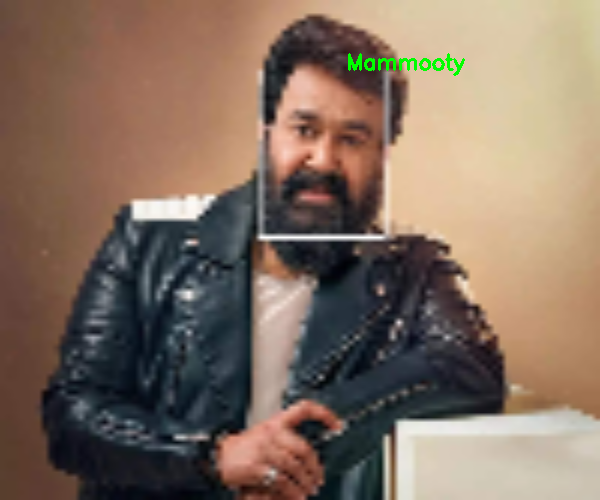

In [61]:
img= cv2.imread('/content/drive/MyDrive/Colab Notebooks/mohanlal.jpg')
hcc = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

img = cv2.resize(img,(800,500))
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
res = hcc.detectMultiScale(gray)

for(x,y,w,h) in res:
    cv2.rectangle(img,(x,y),(x+w, y+h),(255,255,255),2)


img = cv2.resize(img,(100,100))
img = np.array(img,dtype = 'uint8') 

actors = {'Mohanlal':0,'Mammooty':1}
pred_img = img.reshape(1,100,100,3)

face = loaded_model.predict(pred_img)
img = cv2.resize(img,(600,500))

from google.colab.patches import cv2_imshow

for i in actors:
    if np.argmax(face) == actors[i]:
        name = i
        cv2.putText(img,name,(x,y),cv2.FONT_HERSHEY_SIMPLEX,.7,(0,255,0),2)
       
cv2_imshow(img)
cv2.waitKey(0)
cv2.destroyAllWindows()



In [54]:
pred_img

array([[[[105, 103, 109],
         [106, 104, 110],
         [106, 104, 110],
         ...,
         [103, 101, 107],
         [103, 101, 107],
         [103, 101, 107]],

        [[106, 104, 110],
         [106, 104, 110],
         [107, 105, 111],
         ...,
         [104, 102, 108],
         [104, 102, 108],
         [104, 102, 108]],

        [[106, 104, 110],
         [107, 105, 111],
         [107, 105, 111],
         ...,
         [104, 102, 108],
         [104, 102, 108],
         [104, 102, 108]],

        ...,

        [[233, 212, 211],
         [235, 215, 213],
         [239, 218, 217],
         ...,
         [245, 227, 226],
         [245, 227, 226],
         [244, 226, 225]],

        [[232, 211, 210],
         [235, 214, 213],
         [239, 218, 217],
         ...,
         [245, 227, 226],
         [245, 227, 226],
         [244, 226, 225]],

        [[234, 213, 212],
         [237, 216, 215],
         [241, 220, 219],
         ...,
         [245, 227, 226],
        

1/1 [==============================] - 0s 156ms/step


array([[0., 1.]], dtype=float32)

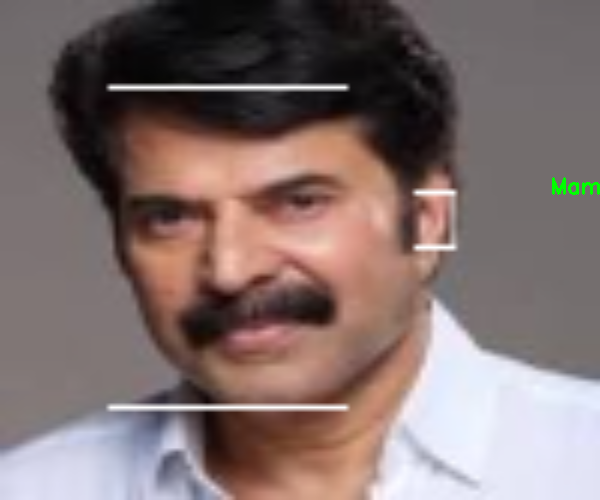